In [1]:
import os
import sys
import time
import glob
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from liblibra_core import *
from libra_py.workflows.nbra import step3
from libra_py import units, data_stat, data_io


/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/98722002/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<float,

In [5]:
%matplotlib inline
# Generate the energies
energy_files = glob.glob('../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd*re*')
#print('Energy files are:', energy_files)

energy_files = data_io.sort_hvib_file_names(energy_files)
#print('Sorted energy files are:', energy_files)
dt = 1.0 # fs
energies = []
for file in energy_files:
    diag_elements = np.diag(sp.load_npz(file).todense().real)
    energies.append(diag_elements)
energies = np.array(energies)*units.au2ev


# In[5]:

(1996, 626)


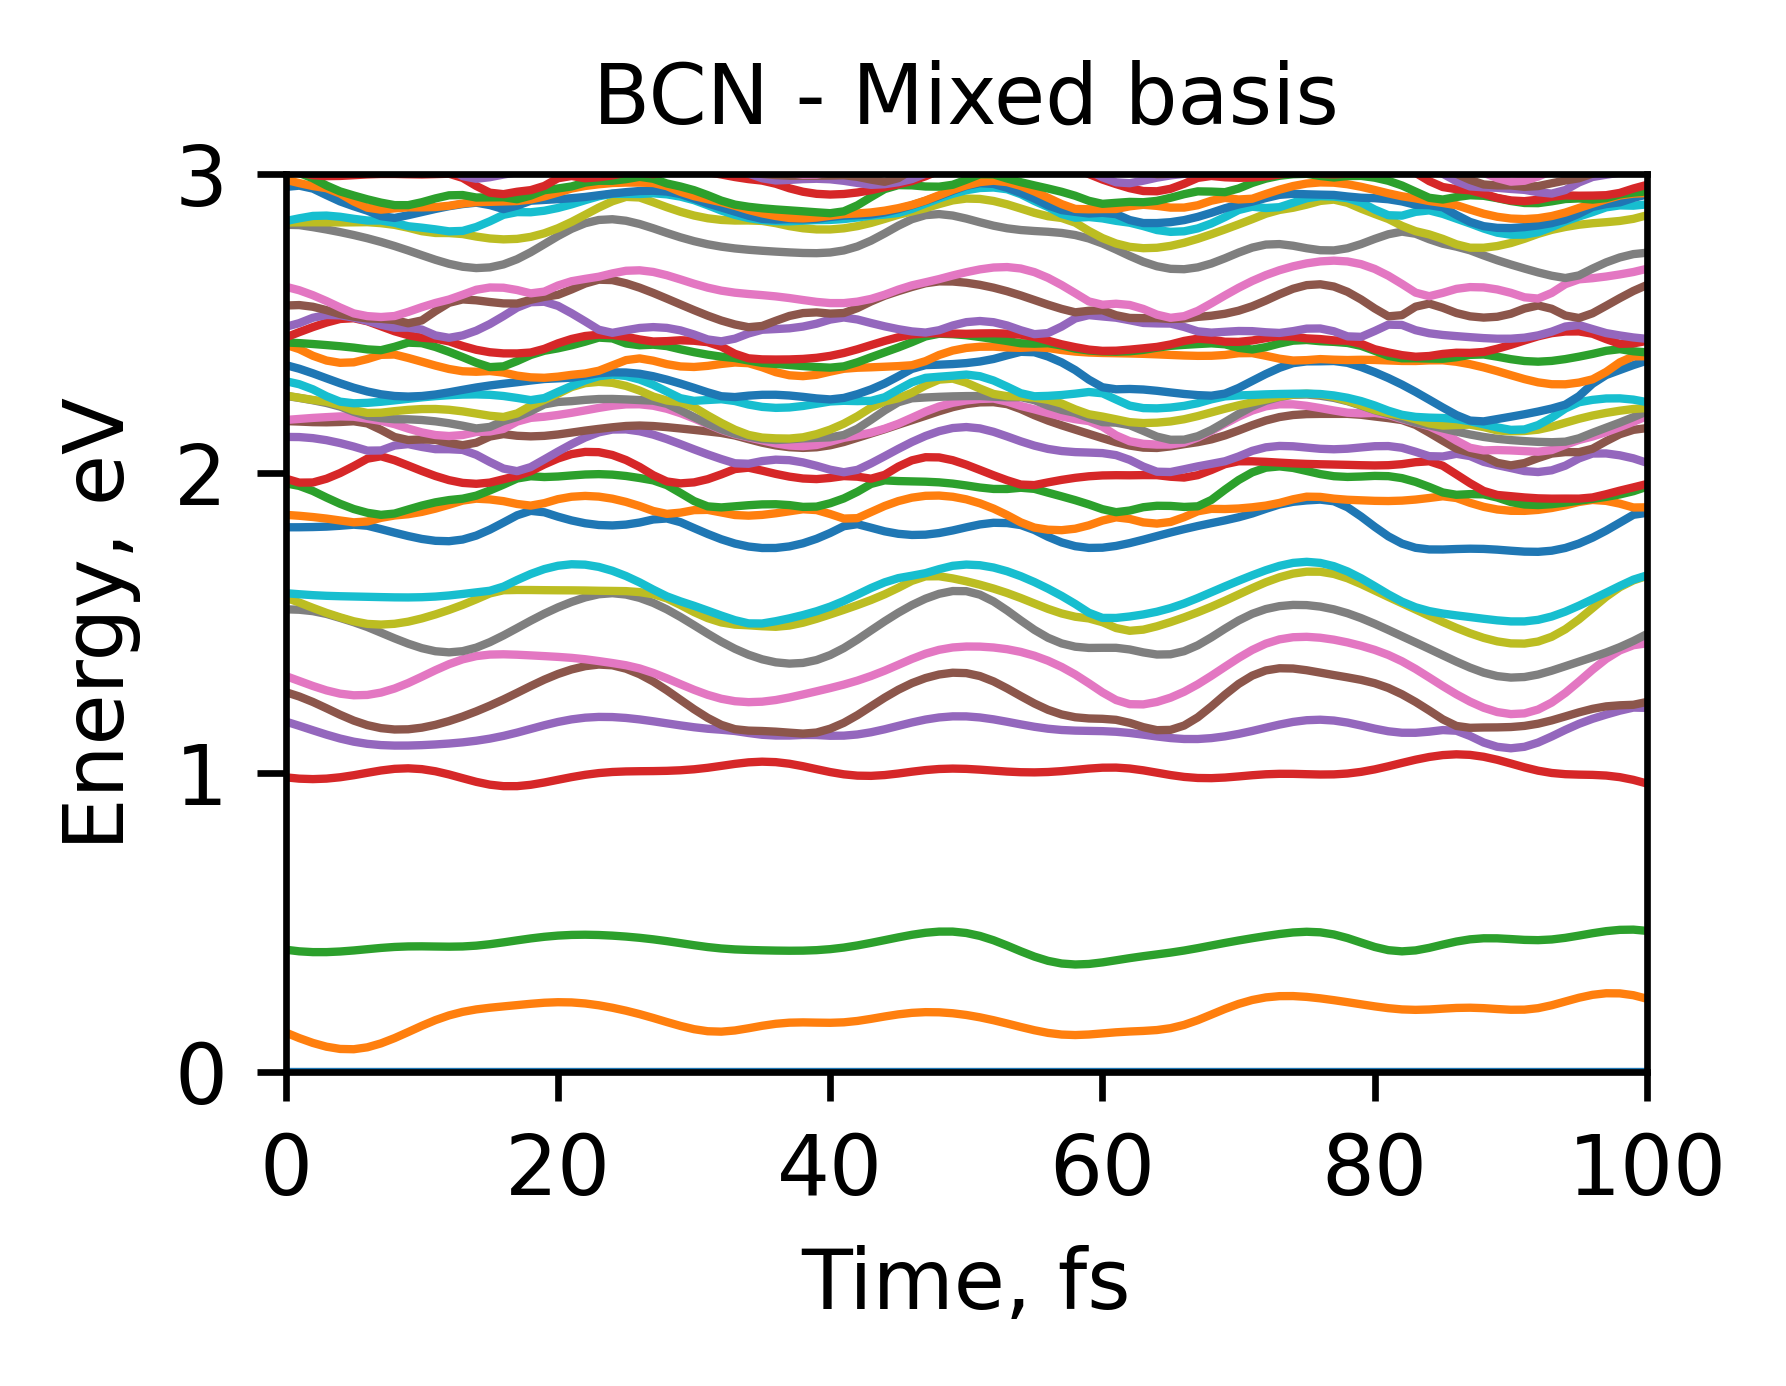

In [6]:

# Plot energies vs time
#get_ipython().run_line_magic('matplotlib', 'notebook')
plt.figure(figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
md_time = np.arange(0,energies.shape[0])
print(energies.shape)
for i in range(energies.shape[1]):
    plt.plot(md_time, energies[:,i]-energies[:,0],lw=1.0)
plt.title('BCN - Mixed basis', fontsize=10)
plt.ylabel('Energy, eV', fontsize=10)
plt.xlabel('Time, fs', fontsize=10)
# plt.xlim(750,850)
plt.xlim(0,100)
plt.ylim(0,3)

# plt.xticks([750,775,800,825,850], ['0','25','50','75','100'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('E_vs_Time.jpg', dpi=600)

np.savetxt('ene_ave', np.average(energies, axis=0))
# In[6]:


In [3]:
# Plot NAC map
nac_files = glob.glob('../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd*im*')
print('nac_files are:', nac_files)

for c, nac_file in enumerate(nac_files):
    nac_mat = sp.load_npz(nac_file).todense().real
    if c==0:
        nac_ave = np.zeros(nac_mat.shape)
    nac_ave += np.abs(nac_mat)
nac_ave *= 1000*units.au2ev/c
nstates = nac_ave.shape[0]


# In[9]:


nac_files are: ['../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1000_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1001_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1002_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1003_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1004_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1005_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1006_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1007_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1008_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1009_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1010_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1011_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1012_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1013_im.npz', '../04_step3_cp2k/res-mixed-basis-energy/Hvib_sd_1014_im.npz', '../04_step3_cp2k/res-mixed-basis-energ

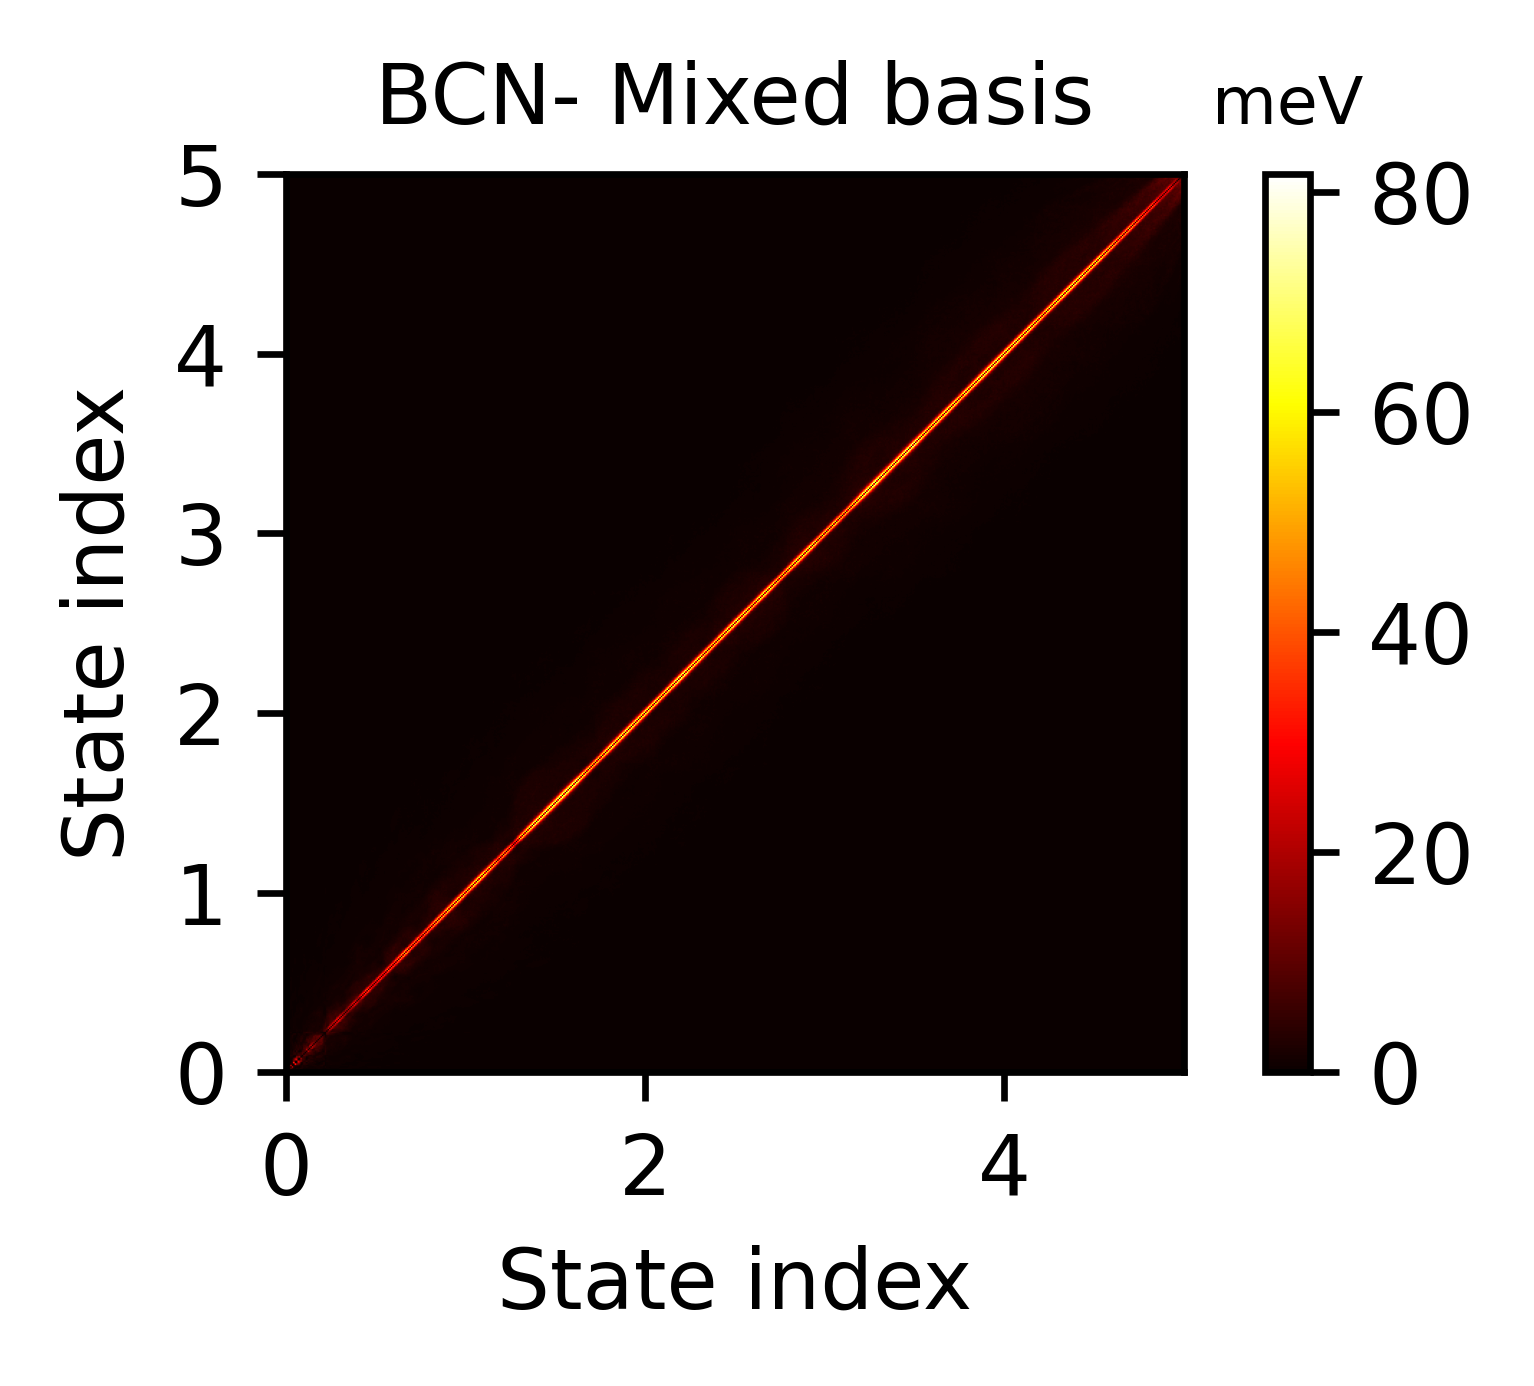

In [4]:


#get_ipython().run_line_magic('matplotlib', 'notebook')
plt.figure(figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
plt.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,5,0,5))#, vmin=0, vmax=150)
plt.xlabel('State index', fontsize=10)
plt.ylabel('State index', fontsize=10)
plt.colorbar().ax.set_title('meV', fontsize=8)
plt.title('BCN- Mixed basis', fontsize=10)
plt.tight_layout()
plt.savefig('BCN_mixed_basis_nac_map.jpg', dpi=600)
np.savetxt('nac_ave_sd', nac_ave)
plt.show()
# In[10]:

In [5]:

nac_files = glob.glob('../04_step3_cp2k/res-ks/Hvib_ks*im*')
print('nac_files are:', nac_files)

for c, nac_file in enumerate(nac_files):
    nac_mat = sp.load_npz(nac_file).todense().real
    if c==0:
        nac_ave = np.zeros(nac_mat.shape)
    nac_ave += np.abs(nac_mat)
nac_ave *= 1000*units.au2ev/c
nstates = nac_ave.shape[0]


# In[9]:


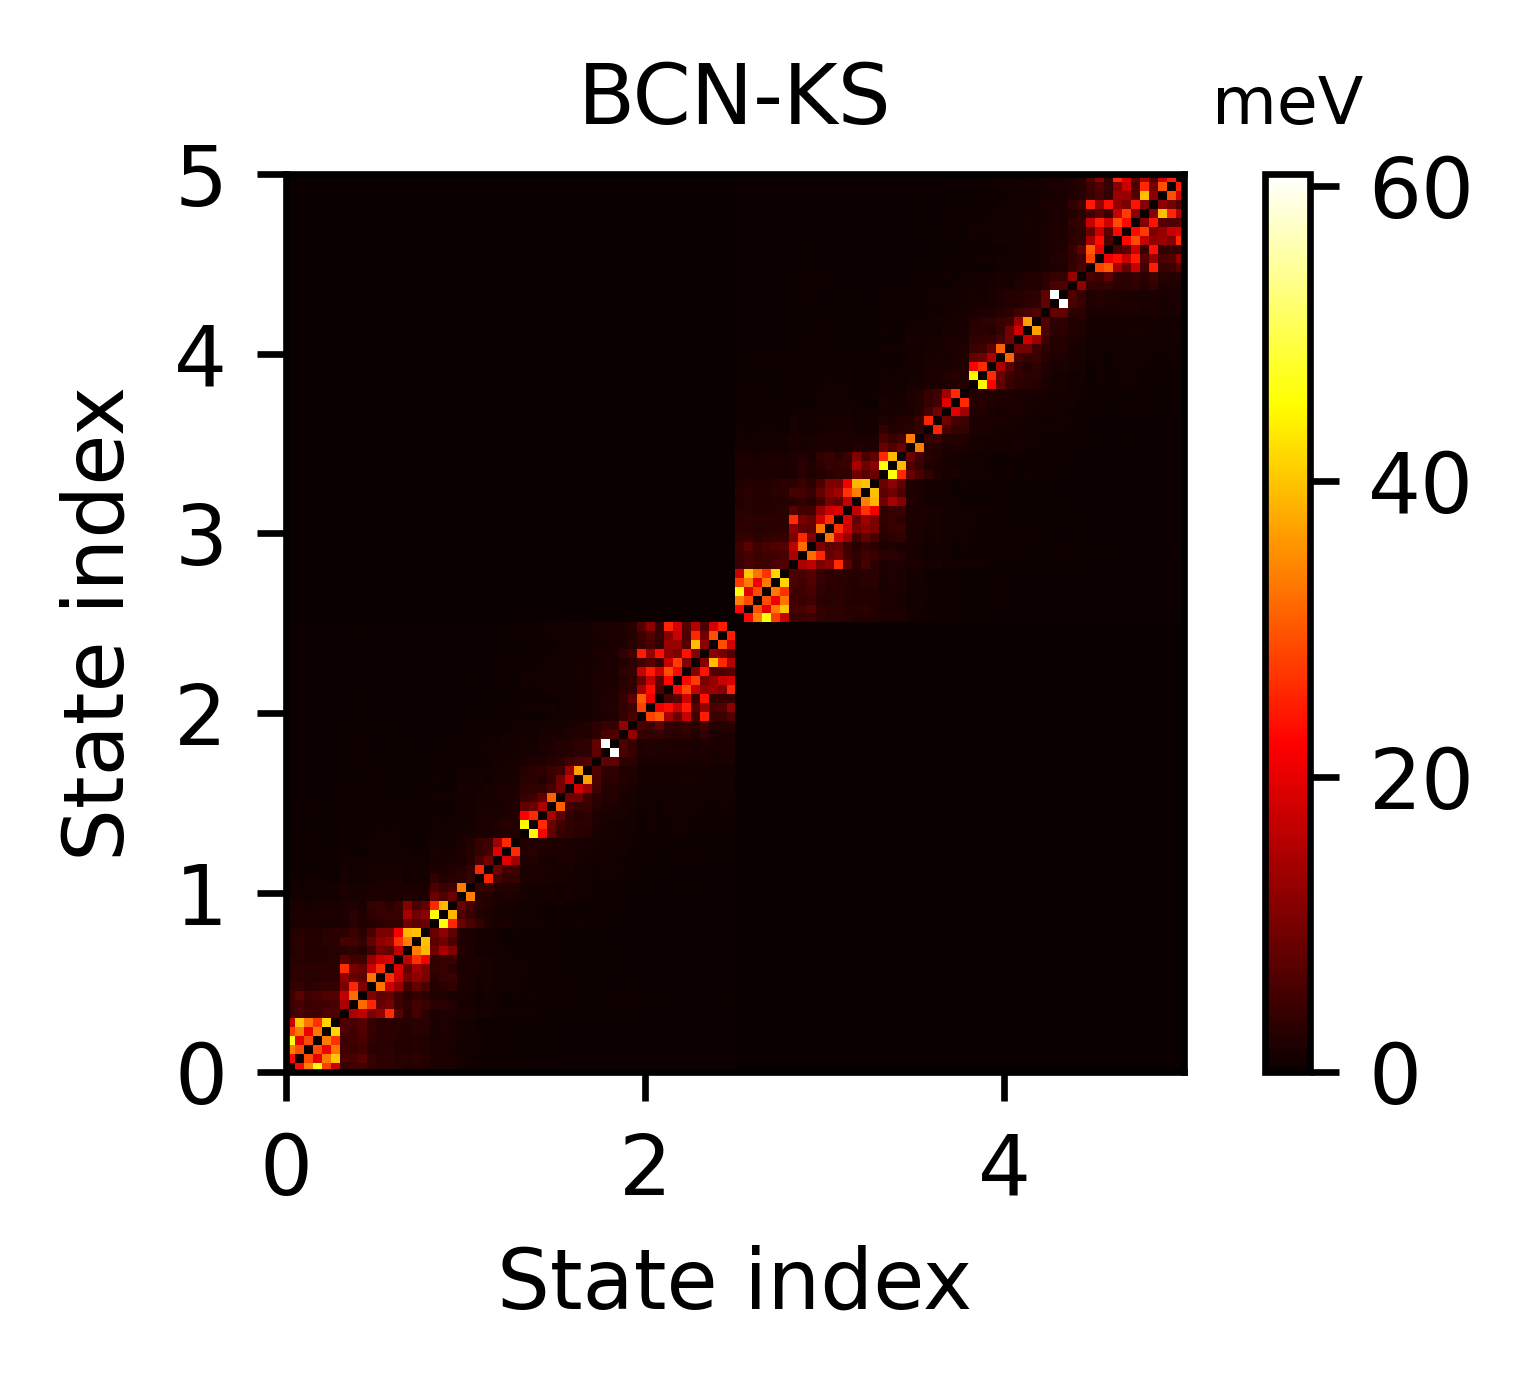

In [6]:


#get_ipython().run_line_magic('matplotlib', 'notebook')
plt.figure(figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
plt.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates))#, vmin=0, vmax=150)
plt.xlabel('State index', fontsize=10)
plt.ylabel('State index', fontsize=10)
plt.colorbar().ax.set_title('meV', fontsize=8)
plt.title('BCN-KS', fontsize=10)
plt.tight_layout()
plt.savefig('BCNks_basis_nac_map.jpg', dpi=600)
np.savetxt('nac_ave_ks', nac_ave)

# In[]

In [12]:



# Plot PDOS average
def gaussian_function(a, mu, sigma, num_points, x_min, x_max):
    pre_fact = (a/sigma)/(np.sqrt(2*np.pi))
    x = np.linspace(x_min, x_max, num_points)
    x_input = np.array((-1/2)/(np.square(sigma))*np.square(x-mu))
    gaussian_fun = pre_fact*np.exp(x_input)
    
    return x, gaussian_fun
    
def gaussian_function_vector(a_vec, mu_vec, sigma, num_points, x_min, x_max):
    for i in range(len(a_vec)):
        if i==0:
            sum_vec = np.zeros(num_points)
        energy_grid, conv_vec = gaussian_function(a_vec[i], mu_vec[i], sigma, num_points, x_min, x_max)
        sum_vec += conv_vec
    return energy_grid, sum_vec


# In[15]:

In [ ]:


#sys.exit(0)
#get_ipython().run_line_magic('matplotlib', 'notebook')
plt.figure(figsize=(3.21, 2.41), dpi=600, edgecolor='black', frameon=True)
path_to_all_pdos = os.getcwd()+'/../../3_overlaps/2x2_C3N4/all_pdosfiles'
atoms = ['C', 'N']
orbitals_cols = [[3], range(4,7), range(7,12), range(12,19)]
orbitals = ['s','p','d','f']
npoints = 1000
sigma = 0.05
shift = 3.0 # eV
ave_pdos_convolved_all = []
for c1,i in enumerate([1,2]):
    pdos_files = glob.glob(path_to_all_pdos+F'/*k{i}*.pdos')
    for c2, pdos_file in enumerate(pdos_files):
        pdos_mat = np.loadtxt(pdos_file)
        if c2==0:
            pdos_ave = np.zeros(pdos_mat.shape)
        pdos_ave += pdos_mat
    pdos_ave /= c2+1
    pdos_ave[:,1] *= units.au2ev
    e_min = np.min(pdos_ave[:,1])-shift
    e_max = np.max(pdos_ave[:,1])+shift
    homo_level = np.max(np.where(pdos_ave[:,2]==2.0))
    homo_energy = pdos_ave[:,1][homo_level]
    for c3, orbital_cols in enumerate(orbitals_cols):
        try:
            sum_pdos_ave = np.sum(pdos_ave[:,orbital_cols],axis=1)
            ave_energy_grid, ave_pdos_convolved = gaussian_function_vector(sum_pdos_ave, pdos_ave[:,1], sigma,
                                                                               npoints, e_min, e_max)
            ave_pdos_convolved_all.append(ave_pdos_convolved)
            pdos_label = atoms[c1]+F', {orbitals[c3]}'
            plt.plot(ave_energy_grid-homo_energy, ave_pdos_convolved, label=pdos_label)
        except:
            pass
    #try:
    #    sum_pdos_ave = np.sum(pdos_ave[:,3::],axis=1)
    #    ave_energy_grid, ave_pdos_convolved = gaussian_function_vector(sum_pdos_ave, pdos_ave[:,1], sigma,
    #                                                                       npoints, e_min, e_max)
    #    ave_pdos_convolved_all.append(ave_pdos_convolved)
    #    pdos_label = atoms[c1]
    #    plt.plot(ave_energy_grid-homo_energy, ave_pdos_convolved, label=pdos_label)
    #except:
    #    pass


ave_pdos_convolved_total = np.sum(np.array(ave_pdos_convolved_all),axis=0)
plt.plot(ave_energy_grid-homo_energy, ave_pdos_convolved_total, color='black', label='Total')
plt.legend(fontsize=7)
plt.xlim(-5,5)
plt.xticks([-5,-2.5,0.0,2.5,5], fontsize=10)
plt.ylabel('pDOS, 1/eV', fontsize=10)
plt.xlabel('Energy, eV', fontsize=10)
plt.title('B80, 300 K', fontsize=10)
plt.tight_layout()
#plt.savefig('../C3N4_pdos.jpg', dpi=600)
plt.savefig('B80_pdos_1.jpg', dpi=600)







